In [1]:
import os
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import math
import warnings
warnings.filterwarnings("ignore")
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
#Choosing the file location
os.chdir(r"C:\Users\me19b\OneDrive\Desktop\PRML")
os.getcwd()
dataset = pd.read_csv('Dataset.csv',header = None)
dataset.columns = ['x1','x2']

In [3]:
dataset

,x1,x2
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


# i. Write a piece of code to run the algorithm studied in class for the K-means problem with k = 4 . Try 5 different random initialization and plot the error function w.r.t iterations in each case. In each case, plot the clusters obtained in different colors.


In [4]:
#converting dataset to numpy (data)
data = dataset.to_numpy()

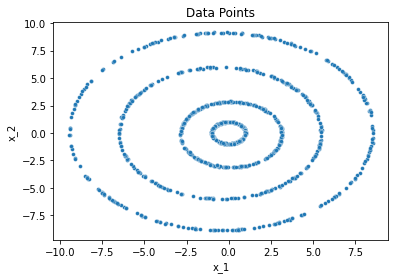

In [5]:
sns.scatterplot(x=dataset.x1, y= dataset.x2,s = 15);

plt.xlabel('x_1')
plt.ylabel('x_2')

plt.title("Data Points");

In [6]:
#Finding initial means 
def initial_means(data,Number_of_clus,mean):
    minimum_distance = []
    maximum_distance = []
    for k in range(1,Number_of_clus):
        for i in range(0,len(data)):
            for j in range(0,len(mean)):
                minimum_distance.append(np.linalg.norm(data[i]-np.array(mean[j])))
            maximum_distance.append(min(minimum_distance))
            minimum_distance = []
        mean.append(list(np.array((data[maximum_distance.index(max(maximum_distance))]))))
        maximum_distance = []
    return mean

#forming new clusters with cluster function
def cluster(data, mean, Number_of_clus):
    near_mean = []
    Z = []
    clust_no = []
    err = 0
    #creating empty list for cluster division
    for i in range(0,Number_of_clus):
        Z.append([])
    for i in range(0,len(dataset)):
        #calculating the distance from data points to all means
        for j in range(0,Number_of_clus):
            distance = data[i]-np.array(mean[j])
            near_mean.append(distance@distance.transpose())
        #appending the cluster number of data point to k in correspoding index
        clust_no.append(near_mean.index(min(near_mean))+1)
        #clustering the data points to their respective cluster
        Z[near_mean.index(min(near_mean))].append(list(data[i]))
        #calculating error
        err = err+min(near_mean)
        near_mean = []
    return Z,clust_no,err

#Calculating new mean for the clusters from the above function 
def new_cluster_mean(Z,Number_of_clus):
    #Claculating mean of the same clusters
    new_mean = []
    for i in range(0,Number_of_clus):
        new_mean.append([])
    for i in range(0,Number_of_clus):
        for j in range(0,len(np.array(Z[i]).transpose())):
            new_mean[i].append((np.array(Z[i])[:,j]).mean())
    return new_mean

#Finding Final Clusters, means, error
def final(data,Number_of_clus,idx):
    means = []
    means.append(list(data[idx]))
    first_means = initial_means(data,Number_of_clus,means)
    
    error_list = []
    cluster_1, k1, error = cluster(data,first_means,Number_of_clus)
    error_list.append(error)
    k_t = k1
    mean_t = new_cluster_mean(cluster_1,Number_of_clus)
    while(True):
        cluster_t1, k_t1,error = cluster(data,mean_t,Number_of_clus)
        mean_t1 = new_cluster_mean(cluster_t1,Number_of_clus)
        if k_t1 != k_t:
            k_t = k_t1
            cluster_t = cluster_t1
            mean_t = mean_t1
            error_list.append(error)
        else: 
            break
    return k_t,mean_t,error_list

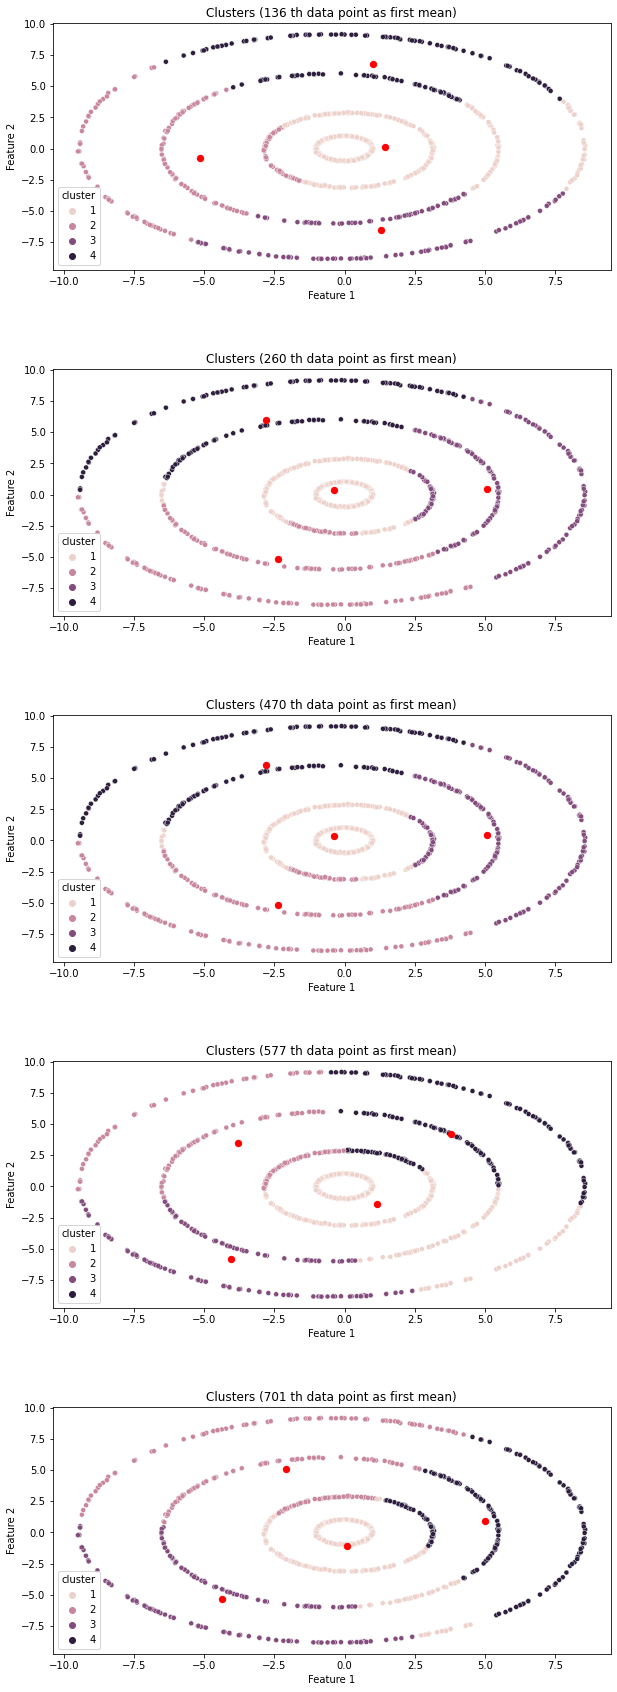

In [7]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
Number_of_clus=4
radomn5 = [135,259,469,576,700]
a = 1
for i in range(0,len(radomn5)):
    cluster_number,mean_t,error_list = final(data,Number_of_clus,radomn5[i])
    
    dataset = pd.DataFrame(data)
    dataset.columns = ['x1','x2']
    z = pd.DataFrame(cluster_number)
    z.columns = ['cluster']
    dataset = pd.concat([dataset,z],axis=1)
    
    plt.subplot(5,1,a)
    sns.scatterplot(x=dataset.x1,y = dataset.x2,hue = dataset.cluster, s = 25)
    for j in range(0,Number_of_clus):
        plt.scatter(mean_t[j][0],mean_t[j][1],color = 'red',s=40)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clusters ('+str(radomn5[i]+1)+' th data point as first mean)');
    a = a+1


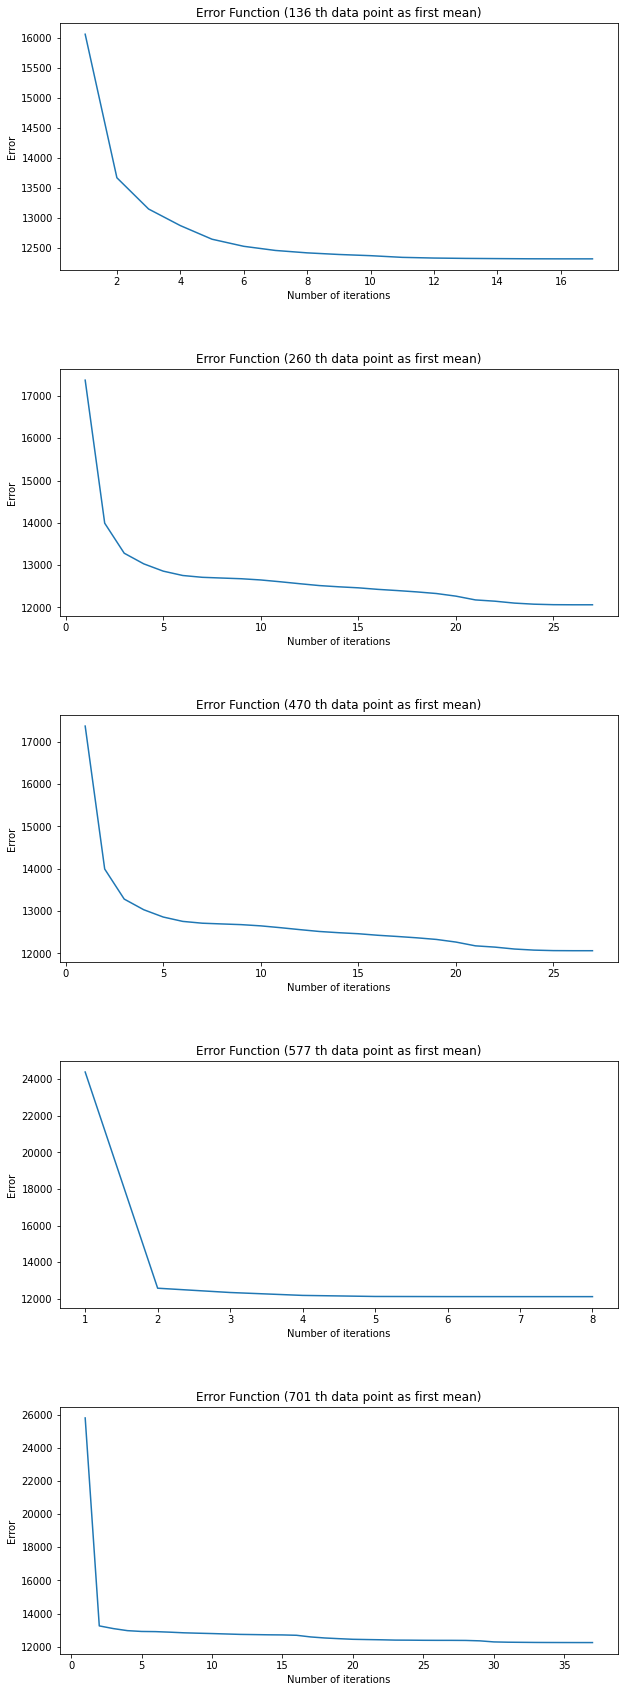

In [8]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
Number_of_clus=4
radomn5 = [135,259,469,576,700]
a = 1
for i in range(0,len(radomn5)):
    cluster_number,mean_t,error_list = final(data,Number_of_clus,radomn5[i])
    
    x = [x  for x in range(1,len(error_list)+1)]

    plt.subplot(5,1,a)
    plt.plot(x, error_list)
    plt.xlabel('Number of iterations')
    plt.ylabel('Error')
    plt.title('Error Function ('+str(radomn5[i]+1)+' th data point as first mean)');
    a = a+1

In [19]:
dataset

,x1,x2,cluster
0,0.14300,0.98493,1
1,-0.30467,0.98562,1
2,0.46625,-0.84003,1
3,0.94847,0.37222,1
4,-0.96871,-0.26697,1
...,...,...,...
995,4.48210,-7.40030,1
996,-3.49630,8.63860,2
997,6.10620,-5.98640,4
998,-7.40940,-5.52050,3


### For K=2

In [31]:
def random_intial(data,k):
    
    #Taking ramdom values for (k={2,3,4,5})
    
    rand_int = [random.randint(1,k) for i in range(len(data))]
    #Creating empty cluster list
    cluster_t = []
    for i in range(0,k):
        rand_int[i] = i+1
        cluster_t.append([])
    
    #Appending to respective clusters
    for i in range(0,len(data)):
        cluster_t[rand_int[i]-1].append(list(data[i]))
    
    #Finding the mean for the correspoing cluster groups
    mean_t = new_cluster_mean(cluster_t,k)
    z_t = rand_int

    #using while loop to get the final clusters
    while(True):
        cluster_t1, z_t1,error = cluster(data,mean_t,k)
        mean_t1 = new_cluster_mean(cluster_t1,k)
        if z_t1 != z_t:
            z_t = z_t1
            cluster_t = cluster_t1
            mean_t = mean_t1
        else: 
            break
            
    z = pd.DataFrame(z_t)
    z.columns = ['cluster']
    dataset = pd.read_csv('Dataset.csv',header = None)
    dataset.columns = ['x1','x2']
    df = pd.concat([dataset,z],axis=1)
    return df,mean_t

In [32]:
#plotting function
def plot(d_f,mean,Number_of_clus,a):
    plt.subplot(2,2,a)
    sns.scatterplot(x=d_f.x1,y = d_f.x2,hue = d_f.cluster, s = 25);
    for i in range(0,Number_of_clus):
        plt.scatter(mean[i][0],mean[i][1],color = 'red',s=40)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data points in '+str(Number_of_clus)+' Clusters');

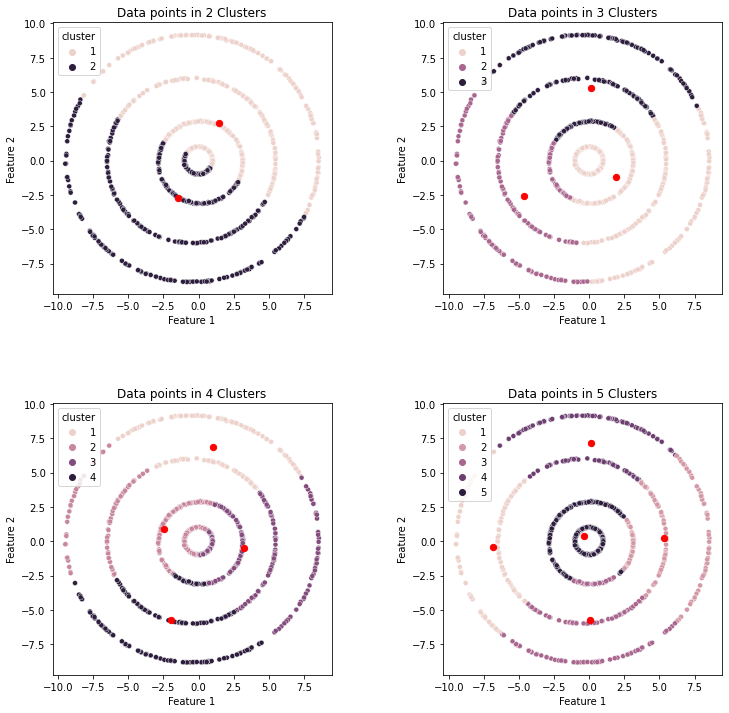

In [34]:
#plotting dataset divided into k clusters
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
a = 1
for Number_of_clus in range(2,6):
    data_x,mean = random_intial(data,Number_of_clus)
    plot(data_x,mean,Number_of_clus,a)
    a=a+1

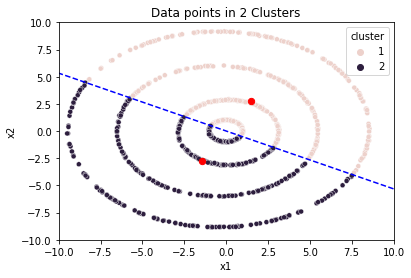

In [36]:
Number_of_clus = 2
d_e,mean = random_intial(data,Number_of_clus)
x1 = mean[0][0]
y1 = mean[0][1]
x2 = mean[1][0]
y2 = mean[1][1]
mean_avg = [(x1+x2)/2,(y1+y2)/2]
slope = -((x2-x1)/(y2-y1))
c = mean_avg[1] + slope*mean_avg[0]
x3 =10
y3 = slope*x3+c
x4 = -10
y4 = slope*x4+c
plt.plot([x3,x4],[y3,y4],'b--')
sns.scatterplot(x=d_e.x1,y = d_e.x2,hue = d_e.cluster, s = 25);
for i in range(0,Number_of_clus):
    plt.scatter(mean[i][0],mean[i][1],color = 'red',s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-10,10)
plt.ylim(-10,10)    
plt.title('Data points in '+str( Number_of_clus)+' Clusters');

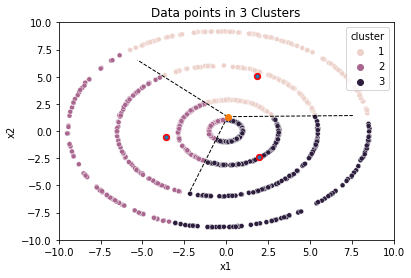

In [38]:
Number_of_clus= 3
d_e,mean = random_intial(data,Number_of_clus)
vor=Voronoi(mean)
figure = voronoi_plot_2d(vor)
sns.scatterplot(x=d_e.x1,y = d_e.x2,hue = d_e.cluster, s = 25);
for i in range(0,Number_of_clus):
    plt.scatter(mean[i][0],mean[i][1],color = 'red',s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-10,10)
plt.ylim(-10,10)    
plt.title('Data points in '+str( Number_of_clus)+' Clusters');

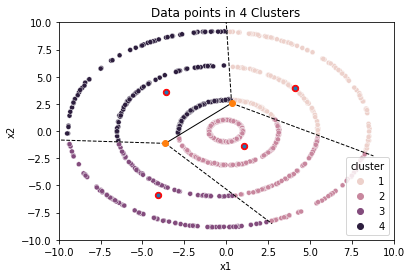

In [40]:
Number_of_clus = 4
d_e,mean = random_intial(data,Number_of_clus)
vor=Voronoi(mean)
figure = voronoi_plot_2d(vor)
sns.scatterplot(x=d_e.x1,y = d_e.x2,hue = d_e.cluster, s = 25);
for i in range(0,Number_of_clus):
    plt.scatter(mean[i][0],mean[i][1],color = 'red',s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-10,10)
plt.ylim(-10,10)    
plt.title('Data points in '+str(Number_of_clus)+' Clusters');

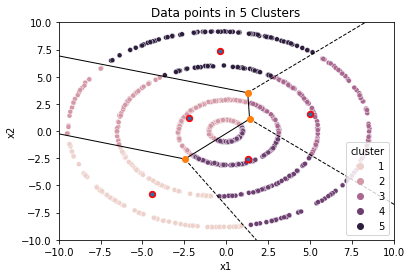

In [41]:
Number_of_clus = 5
d_e,mean = random_intial(data,Number_of_clus)
vor=Voronoi(mean)
figure = voronoi_plot_2d(vor)
sns.scatterplot(x=d_e.x1,y = d_e.x2,hue = d_e.cluster, s = 25);
for i in range(0,Number_of_clus):
    plt.scatter(mean[i][0],mean[i][1],color = 'red',s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-10,10)
plt.ylim(-10,10)    
plt.title('Data points in '+str( Number_of_clus)+' Clusters');

### Run the spectral clustering algorithm (spectral relaxation of K-means using KernelPCA) k = 4. Choose an appropriate kernel for this data-set and plot the clusters obtained in different colors. Explain your choice of kernel based on the output you obtain.

In [47]:
def Radial_basis_function(data,sigma):
    n=len(data)
    data_a = dataset.to_numpy()
    K_s = np.empty([n,n])
    
    for i in range(0,n):
        for j in range(i,n): 
            k_x = math.exp((-((data_a[i]-data_a[j]).transpose())@(data_a[i]-data_a[j]))/(2*(sigma**2)))
            K_s[i,j] = k_x
            K_s[j,i] = k_x
            
    #Kernel centered = (I−1n)K(I−1n)        
    matrix = np.eye(1000) - (1/1000)*np.ones([1000,1000])
    K_s_centered = matrix@K_s@matrix
    
    eigenvalues_k_s, eigenvectors_k_s = eig(K_s_centered)

    ind = eigenvalues_k_s.argsort()[::-1]   
    eigenvalues_k_s = eigenvalues_k_s[ind]
    eigenvectors_k_s = eigenvectors_k_s[:,ind]
    
    #Selecting top two eigenvalue and eigen vector pairs to show the projection of the datapoints
    eigenvalues_k_s_features = eigenvalues_k_s[0:2]
    eigenvectors_k_s_matrix = eigenvectors_k_s.transpose()[0:2]
    
    #Normalizing the eigenvectors to the length 1/sq.root(n.eigenvalue) respectively
    for i in range(0,len(eigenvalues_k_s_features)):
        eigenvectors_k_s_matrix[i] = (eigenvectors_k_s_matrix[i])/((n*abs(eigenvalues_k_s_features[i]))**0.5)
    
    #Dataset projection on first 2 principle components
    X_proj = K_s_centered@eigenvectors_k_s_matrix.transpose()
    
    for i in range(0,len(data)):
        if ((eigenvalues_k_s[0:i].sum())/(eigenvalues_k_s.sum()))>=0.95:
            k_fea = i
            break
    
    eigenvalues_features_sigma = eigenvalues_k_s[0:k_fea]
    eigenvectors_features_sigma = (eigenvectors_k_s.transpose())[0:k_fea]

    H_f = eigenvectors_features_sigma.transpose()
    
    return X_proj,H_f

In [48]:
sigma = 3.8
sigma_projection, H_x =Radial_basis_function(data,sigma)
Data = np.empty([len(H_x),len(H_x.transpose())])
for j in range(0,len(H_x)):
    Data[j] = (H_x[j])/((H_x[j]@H_x[j].transpose())**0.5)

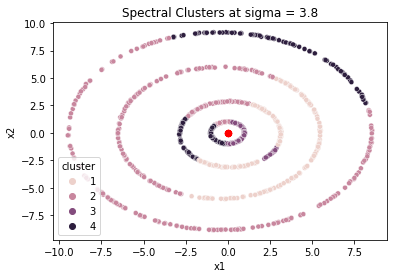

In [77]:
Mean = Data[423]
Number_of_clus = 4 
cluster_number,mean_t,error_list = final(Data,Number_of_clus,300)

dataset = pd.DataFrame(data)
dataset.columns = ['x1','x2']
z = pd.DataFrame(cluster_number)
z.columns = ['cluster']
dataset = pd.concat([dataset,z],axis=1)

sns.scatterplot(x=dataset.x1,y = dataset.x2,hue = dataset.cluster, s = 25)
for j in range(0,Number_of_clus ):
    plt.scatter(mean_t[j][0],mean_t[j][1],color = 'red',s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Spectral Clusters at sigma = 3.8');

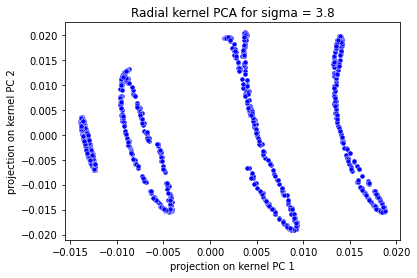

In [78]:
sns.scatterplot(x=sigma_projection[:,0],y=sigma_projection[:,1],color='blue',s =25)
plt.xlabel('projection on kernel PC 1')
plt.ylabel('projection on kernel PC 2')
plt.title("Radial kernel PCA for sigma = 3.8");

In [80]:
X_axis = np.array([1,0])
sigma_projection_X = sigma_projection
sigma_projection_X[:,1] = 0

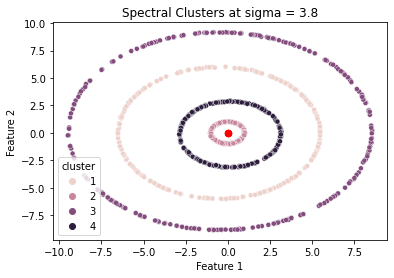

In [81]:
cluster_number,mean_t,error_list = final(sigma_projection_X ,Number_of_clus,600)

dataset = pd.DataFrame(data)
dataset.columns = ['x1','x2']
z = pd.DataFrame(cluster_number)
z.columns = ['cluster']
dataset = pd.concat([dataset,z],axis=1)

sns.scatterplot(x=dataset.x1,y = dataset.x2,hue = dataset.cluster, s = 25)
for j in range(0,Number_of_clus):
    plt.scatter(mean_t[j][0],mean_t[j][1],color = 'red',s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clusters at sigma = 3.8');

### 4th

In [82]:
sigma = 5
sigma_projection, H= Radial_basis_function(data,sigma)
#Data set need to be assigned to max(rows values for H)
cluster_data = []
for j in range(0,len(H)):
    cluster_data.append(list(H[j]).index(max(H[j])))
clus_h = np.array(cluster_data)
clus_h_unique = list(np.unique(clus_h))

In [83]:
clus_h_unique

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [84]:
def intial_clus(data,unique_clusters,intialised):
    
    #Creating empty cluster list
    cluster_t = []
    k = len(unique_clusters)
    for i in range(0,len(unique_clusters)):
        cluster_t.append([])
    
    #Appending to respective clusters
    for i in range(0,len(dataset)):
        cluster_t[unique_clusters.index(intialised[i])].append(list(data[i]))
        
    #Finding the mean for the correspoing cluster groups
    mean_t = new_cluster_mean(cluster_t,k)
    z_t = intialised

    #using while loop to get the final clusters
    while(True):
        cluster_t1, z_t1,error = cluster(data,mean_t,k)
        mean_t1 = new_cluster_mean(cluster_t1,k)
        if z_t1 != z_t:
            z_t = z_t1
            cluster_t = cluster_t1
            mean_t = mean_t1
        else: 
            break
    
    
    z = pd.DataFrame(z_t)
    z.columns = ['cluster']
    dataset_df = pd.read_csv('Dataset.csv',header = None)
    dataset_df.columns = ['x1','x2']
    data_r = pd.concat([dataset_df,z],axis=1)
    
    return data_r,mean_t

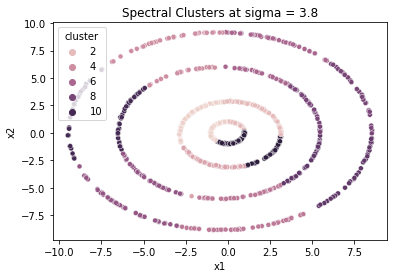

In [85]:
Cluster_H_final,mean = intial_clus(data,clus_h_unique,cluster_data)
sns.scatterplot(x=Cluster_H_final.x1,y = Cluster_H_final.x2,hue = Cluster_H_final.cluster, s = 25)
plt.title('Spectral Clusters at sigma = 3.8');